In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
## 각각의 플렛폼에 따른 폰트 설정을 위해서 
import platform   ## 플랫폼관련 라이브러리
if platform.system() == 'Windows':
    path = "c:\Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family= font_name)
elif platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
else:
    print('check your OS system')

In [3]:
### chromedriver 실행
from selenium import webdriver
import time

driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")

## 인스타그램 접속하기
driver.get("https://www.instagram.com")
time.sleep(2)


C:\Users\djagk\AppData\Local\Temp\ipykernel_880\3581216060.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")


In [4]:
### 로그인 
email = 'djagkdbs@naver.com'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'dytjq7169' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

C:\Users\djagk\AppData\Local\Temp\ipykernel_880\2148519336.py:3: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
C:\Users\djagk\AppData\Local\Temp\ipykernel_880\2148519336.py:8: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [32]:
### 인스타 그램의 검색 결과 url을 반환하는 함수
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/"+word
    return url

word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

In [33]:
### 첫번째 게시물을 찾아 클릭
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(4)

select_first(driver)

C:\Users\djagk\AppData\Local\Temp\ipykernel_880\453199786.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


In [34]:
### 게시글 정보 가져오기
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    html = driver.page_source
    # print(html)
    soup = BeautifulSoup(html,"html.parser")

    ### 본문내용 가져오기
    try:
        content = soup.select("div.C4VMK > div > span")[0].text
        content = unicodedata.normalize('NFC', content)

    except:
        content = ' '
    ### 본문 내용에서 해시태그 가져오기(정규표현식을 사용)
    tags = re.findall(r'#[^\s#,\\]+', content)

    ### 작성일자 정보 가져오기
    date = soup.select("time.FH9sR.RhOlS")[0]['datetime'][:10]

    ### 좋아요 수 가져오기
    try:
        like = soup.select("div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll > span")[0].text
    except:
        like = 0
    ### 위치정보 가져오기
    try: 
        place = soup.select("a.O4GlU")[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    data = [content, date, like, place, tags]
    return data


In [35]:
get_content(driver)

['(광고)제주공항근처 흑돼지와 갈비를 동시에 즐길수있는 맛집💛돈오름 숯불갈비💛때깔고운 흑돼지와 갈비를 숯불향 가득 입히면서 구워먹자~!😋😋두툼하고 육즙가득한 흑돼지 맛은 말해뭐해~~ 🤤💚고기는 먹어도먹어도 질리지가 않아..🥴깔끔하고 넓은 매장이 회식, 모임장소로도 강추!👍👍👍🧭돈오름 숯불갈비주소 : 제주 제주시 신대로12길 33영업시간 : 매일 16:00~00:00예약전화 : 064-746-1578#제주도맛집#신제주맛집#연동맛집#제주공항맛집#제주도공항근처맛집#제주노형동맛집#제원맛집#누웨마루거리맛집#제주공항주변맛집#노형동맛집#제주연동맛집#제주공항흑돼지#제주공항갈비',
 '2022-05-19',
 0,
 '',
 ['#제주도맛집',
  '#신제주맛집',
  '#연동맛집',
  '#제주공항맛집',
  '#제주도공항근처맛집',
  '#제주노형동맛집',
  '#제원맛집',
  '#누웨마루거리맛집',
  '#제주공항주변맛집',
  '#노형동맛집',
  '#제주연동맛집',
  '#제주공항흑돼지',
  '#제주공항갈비']]

In [19]:
### 다음 게시글 열기
def move_next(driver):
    right = driver.find_element_by_css_selector("div.l8mY4.feth3> button")
    right.click()
    time.sleep(4) 

move_next(driver)

C:\Users\djagk\AppData\Local\Temp\ipykernel_880\3109711778.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector("div.l8mY4.feth3> button")


In [10]:
#### 여러개 개시글 정보 수집하기 순서
## 1. 크롬브라우저 열기
## 2. 인스타그램 검색 페이지 url 정보 만들기 : insta_searching()
## 3. 검색페이지 접속하기
## 4. 첫번째 게시물 클릭하기
## 5. 비어있는 변수(result) 만들기
## 6. 게시글 정보 가져오기 : get_content()
## 7. 게시글 정보를 변수(result)에 추가하기
## 8. 다음 게시글 선택하기 : move_next()
## 9. 게시글은 50개 정도 크롤링후 저장 -> 수집 완료... 
## 10. 수집 데이터 저장(1_crawling_jeudoMatJip.xlsx)


from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

## 1
driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")

driver.get('http://www.instargram.com')
time.sleep(3)


### 로그인 
email = 'djagkdbs@naver.com'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'dytjq7169' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)


C:\Users\djagk\AppData\Local\Temp\ipykernel_3280\3719018465.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")
C:\Users\djagk\AppData\Local\Temp\ipykernel_3280\3719018465.py:28: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
C:\Users\djagk\AppData\Local\Temp\ipykernel_3280\3719018465.py:33: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [36]:
# 2. 
word = "제주도맛집"
url = insta_searching(word)

# 3. 
driver.get(url)
time.sleep(5)

# 4.
select_first(driver)

# 5. 변수 선언
results = []

target = 50
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(3)
        move_next(driver)

results[:2]

C:\Users\djagk\AppData\Local\Temp\ipykernel_880\453199786.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


[['(광고)제주공항근처 흑돼지와 갈비를 동시에 즐길수있는 맛집💛돈오름 숯불갈비💛때깔고운 흑돼지와 갈비를 숯불향 가득 입히면서 구워먹자~!😋😋두툼하고 육즙가득한 흑돼지 맛은 말해뭐해~~ 🤤💚고기는 먹어도먹어도 질리지가 않아..🥴깔끔하고 넓은 매장이 회식, 모임장소로도 강추!👍👍👍🧭돈오름 숯불갈비주소 : 제주 제주시 신대로12길 33영업시간 : 매일 16:00~00:00예약전화 : 064-746-1578#제주도맛집#신제주맛집#연동맛집#제주공항맛집#제주도공항근처맛집#제주노형동맛집#제원맛집#누웨마루거리맛집#제주공항주변맛집#노형동맛집#제주연동맛집#제주공항흑돼지#제주공항갈비',
  '2022-05-19',
  0,
  '',
  ['#제주도맛집',
   '#신제주맛집',
   '#연동맛집',
   '#제주공항맛집',
   '#제주도공항근처맛집',
   '#제주노형동맛집',
   '#제원맛집',
   '#누웨마루거리맛집',
   '#제주공항주변맛집',
   '#노형동맛집',
   '#제주연동맛집',
   '#제주공항흑돼지',
   '#제주공항갈비']],
 ['(광고)제주공항근처 흑돼지와 갈비를 동시에 즐길수있는 맛집💛돈오름 숯불갈비💛때깔고운 흑돼지와 갈비를 숯불향 가득 입히면서 구워먹자~!😋😋두툼하고 육즙가득한 흑돼지 맛은 말해뭐해~~ 🤤💚고기는 먹어도먹어도 질리지가 않아..🥴깔끔하고 넓은 매장이 회식, 모임장소로도 강추!👍👍👍🧭돈오름 숯불갈비주소 : 제주 제주시 신대로12길 33영업시간 : 매일 16:00~00:00예약전화 : 064-746-1578#제주도맛집#신제주맛집#연동맛집#제주공항맛집#제주도공항근처맛집#제주노형동맛집#제원맛집#누웨마루거리맛집#제주공항주변맛집#노형동맛집#제주연동맛집#제주공항흑돼지#제주공항갈비',
  '2022-05-19',
  0,
  '',
  ['#제주도맛집',
   '#신제주맛집',
   '#연동맛집',
   '#제주공항맛집',
   '#제주도공항근처맛집',
   '#제주노형동맛집',
   '#제원맛집',
   '#누웨마루거리맛집',
   '

In [37]:
## 결과 저장
import pandas as pd
results_df=pd.DataFrame(results)
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('data_instar/1_crawling_jejudoMatJip.xlsx')

In [ ]:
##"제주맛집" "제주여행","제주관광"

In [38]:
# 2. 
word = "제주맛집"
url = insta_searching(word)

# 3. 
driver.get(url)
time.sleep(5)

# 4.
select_first(driver)

# 5. 변수 선언
results = []

target = 50
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(3)
        move_next(driver)

C:\Users\djagk\AppData\Local\Temp\ipykernel_880\453199786.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


In [39]:
import pandas as pd
results_df=pd.DataFrame(results)
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('data_instar/1_crawling_jejuMatJip.xlsx')

In [40]:
# 2. 
word = "제주여행"
url = insta_searching(word)

# 3. 
driver.get(url)
time.sleep(5)

# 4.
select_first(driver)

# 5. 변수 선언
results = []

target = 50
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(3)
        move_next(driver)

C:\Users\djagk\AppData\Local\Temp\ipykernel_880\453199786.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


In [41]:
import pandas as pd
results_df=pd.DataFrame(results)
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('data_instar/1_crawling_jejuTravel.xlsx')

In [42]:
# 2. 
word = "제주관광"
url = insta_searching(word)

# 3. 
driver.get(url)
time.sleep(5)

# 4.
select_first(driver)

# 5. 변수 선언
results = []

target = 50
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(3)
        move_next(driver)

C:\Users\djagk\AppData\Local\Temp\ipykernel_880\453199786.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


In [43]:
import pandas as pd
results_df=pd.DataFrame(results)
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('data_instar/1_crawling_jejudoGwanGwang.xlsx')

In [49]:
## 여러개의 저장파일 통합
jeju_insta_df=pd.DataFrame([])
folder='data_instar/'
f_list=['1_crawling_jejudoMatJip.xlsx','1_crawling_jejuMatjip.xlsx','1_crawling_jejuTravel.xlsx','1_crawling_jejudoGwanGwang.xlsx']
for fname in f_list:
    file=folder+fname
    temp=pd.read_excel(file)
    jeju_insta_df=jeju_insta_df.append(temp,ignore_index=True)
jeju_insta_df.drop_duplicates(subset=['content'],inplace=True)
jeju_insta_df.to_excel('data_instar/1_crawling_raw.xlsx')

C:\Users\djagk\AppData\Local\Temp\ipykernel_880\3098507895.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df=jeju_insta_df.append(temp,ignore_index=True)
C:\Users\djagk\AppData\Local\Temp\ipykernel_880\3098507895.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df=jeju_insta_df.append(temp,ignore_index=True)
C:\Users\djagk\AppData\Local\Temp\ipykernel_880\3098507895.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df=jeju_insta_df.append(temp,ignore_index=True)
C:\Users\djagk\AppData\Local\Temp\ipykernel_880\3098507895.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df=jeju_inst

In [ ]:
## 워드 클라우드
## 수집한 데이터 중에 해시태그 정보들을 클라우드로 시각화
## 워드 클라우드는텍스트 내에 출현하는 단어들의 출현 빈도수에 비례하여 크기로 표출한 그래프

In [30]:
## 크롤링 결과중 해시태그 데이터 불러오기
import pandas as pd
raw_total=pd.read_excel('data_instar/1_crawling_raw.xlsx')
raw_total['tags'][:5]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3    ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4    ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
Name: tags, dtype: object

In [31]:
## 해시태그 통합 저장하기
tags_total=[]

for tags in raw_total['tags']: 
    #print(tags) 
    tags=tags[2:-2]
    tags_list=tags.split("', '")

    for tag in tags_list:
        tags_total.append(tag)
tags_list[0]
#tags_total

'#HappyNewYearEveryone'

In [32]:
## 해시태그 빈도수 집계
from collections import Counter     #Counter() 함수는 그룹 내 원소별 종류별로 빈도수
tag_counts=Counter(tags_total)

In [33]:
tag_counts.most_common(150)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433

In [34]:
## 데이터 정제
STOPWORD=['#제주도',
        '#제주',
        '',
        '#jeju',
        '#선팔맞팔',
        '#일상',
        '#먹스타맞팔',
        '#좋아요',
        '#키니샵',
        '#먹스타그램맞팔']

tags_total_selected=[]
for tag in tags_total:
    if tag not in STOPWORD:
        tags_total_selected.append(tag)
tag_counts_selected=Counter(tags_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433)]

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys
if sys.platform in ['win32','win64']:
    font_name='malgun gothic'

rc('font',family=font_name)

In [36]:
tag_counts_df=pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns=['tags','counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

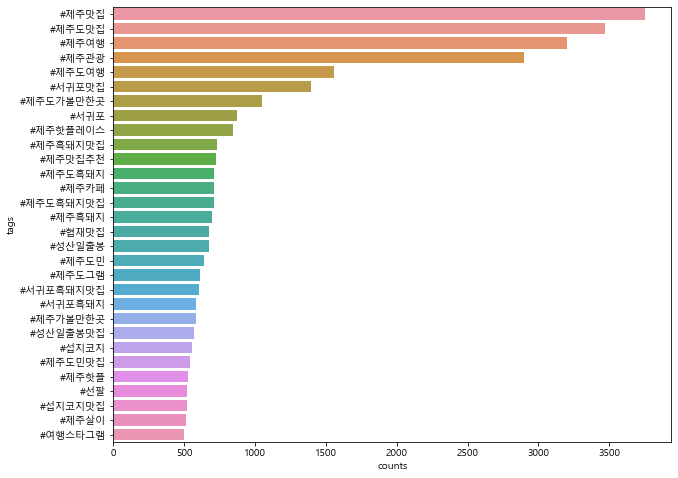

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='tags',data=tag_counts_df)

In [24]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\djagk\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [38]:
## 워드 클라우드 그리기
import matplotlib.pylab as plt
from wordcloud import WordCloud
import platform
if platform.system()=='Windows':
    font_path='c:/Windows/Fonts/malgun.ttf'


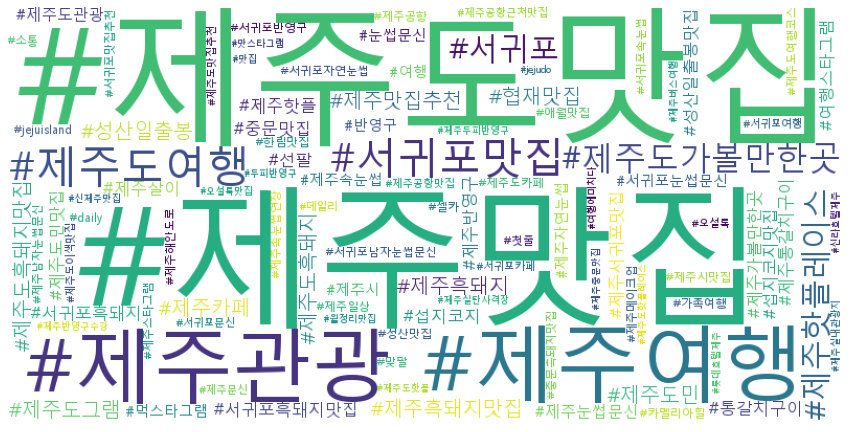

In [40]:
wordcloud=WordCloud(font_path=font_path,
                    background_color='white',
                    max_words=100,
                    relative_scaling=0.3,
                    width=800,
                    height=400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('data_instar/2_tag-wordcloud.png')